#Step 1: Importing Libraries

In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#Step 2: Importing Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/BioStat/SaYoPillow.csv')

In [ ]:
df.head()

,Snoring Rate,Respiration Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.columns

Index(['Snoring Rate', 'Respiration Rate', 'Body Temperature', 'Limb Movement',
       'Blood Oxygen', 'Eye Movement', 'Sleeping Hours', 'Heart Rate',
       'Stress Level'],
      dtype='object')

#Step 3: Analysis

In [ ]:
df.isnull().sum()

Snoring Rate        0
Respiration Rate    0
Body Temperature    0
Limb Movement       0
Blood Oxygen        0
Eye Movement        0
Sleeping Hours      0
Heart Rate          0
Stress Level        0
dtype: int64

<Axes: >

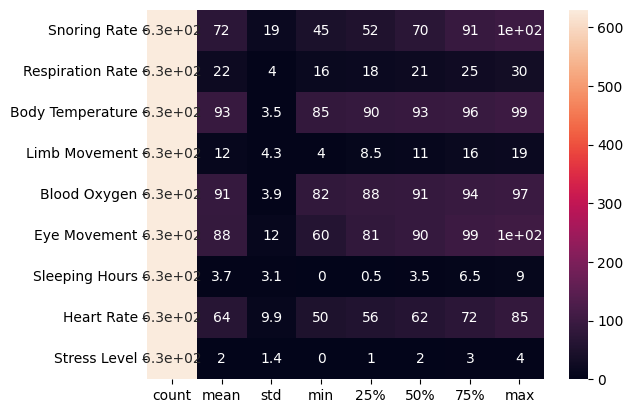

In [ ]:

sns.heatmap(df.describe().T,annot=True)

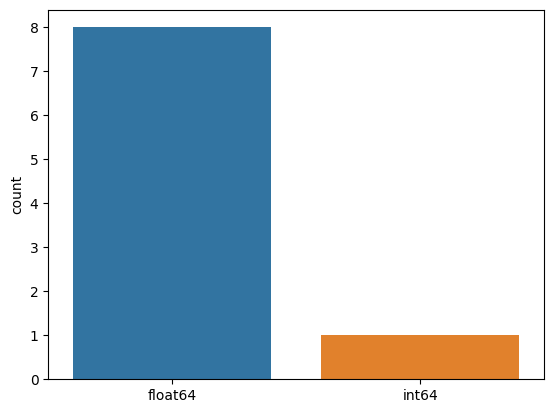

In [ ]:
sns.countplot(x=df.dtypes, data=df)
plt.show()

For Snoring Rate
Skewness: 0.113935
Kurtosis: -1.546614


For Respiration Rate
Skewness: 0.113935
Kurtosis: -1.546614


For Body Temperature
Skewness: 0.113935
Kurtosis: -1.546614


For Limb Movement
Skewness: 0.113935
Kurtosis: -1.546614


For Blood Oxygen
Skewness: 0.113935
Kurtosis: -1.546614


For Eye Movement
Skewness: 0.113935
Kurtosis: -1.546614


For Sleeping Hours
Skewness: 0.113935
Kurtosis: -1.546614


For Heart Rate
Skewness: 0.113935
Kurtosis: -1.546614


For Stress Level
Skewness: 0.113935
Kurtosis: -1.546614




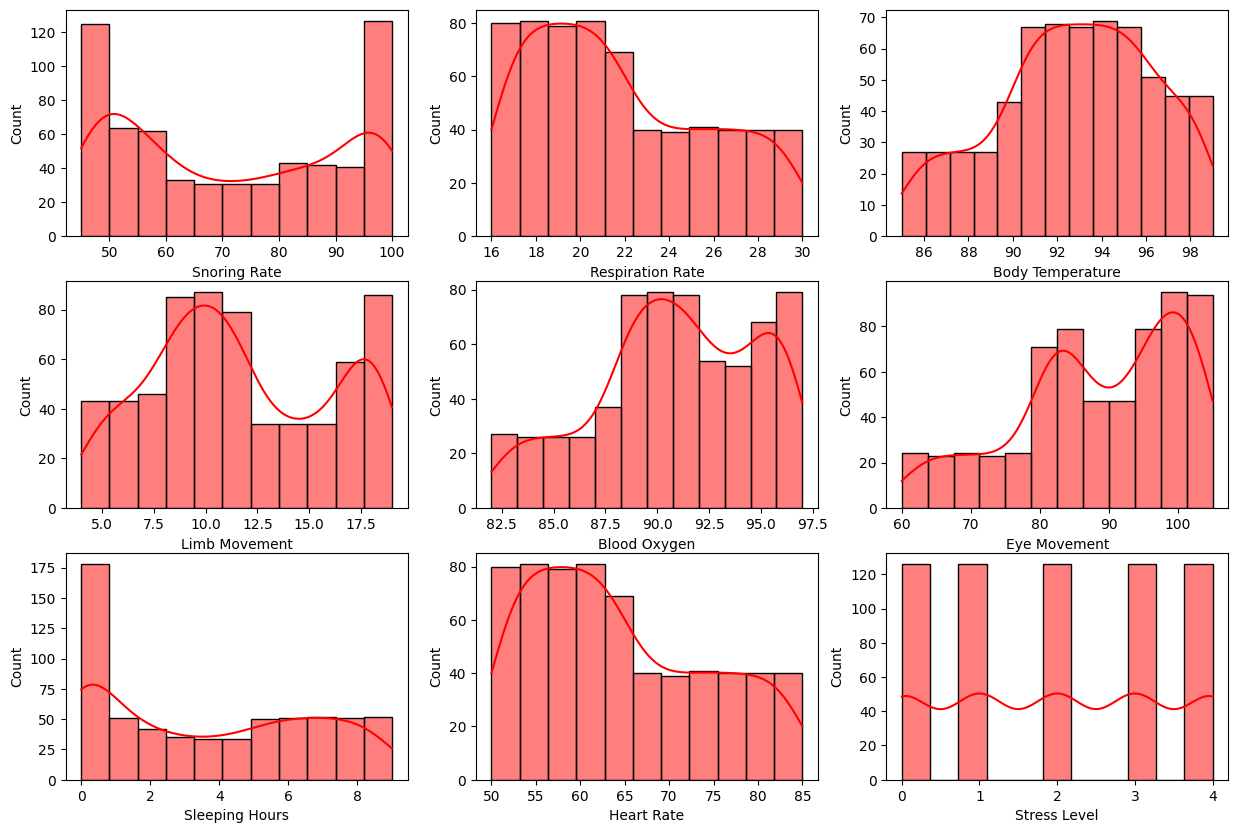

In [ ]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True, color = "red")
    print("For",column)
    print("Skewness: %f" % df['Snoring Rate'].skew())
    print("Kurtosis: %f" % df['Snoring Rate'].kurt())
    print("\n")
plt.show()

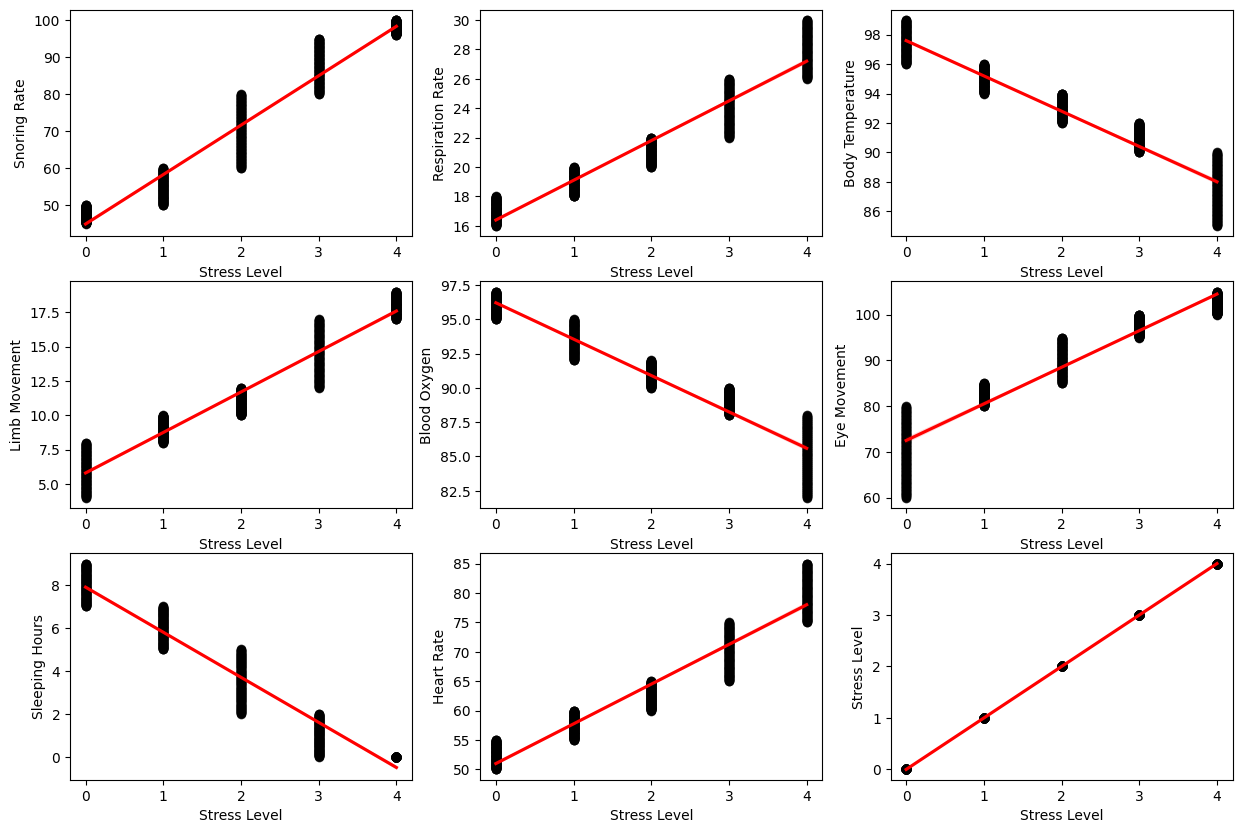

In [ ]:
# regression plot between Stress Level and rest of the columns
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.regplot(x="Stress Level", y=df[column],data=df,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

<Axes: >

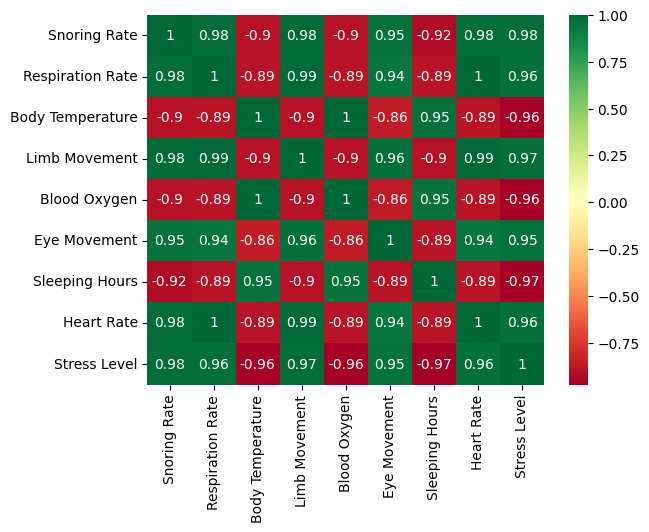

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


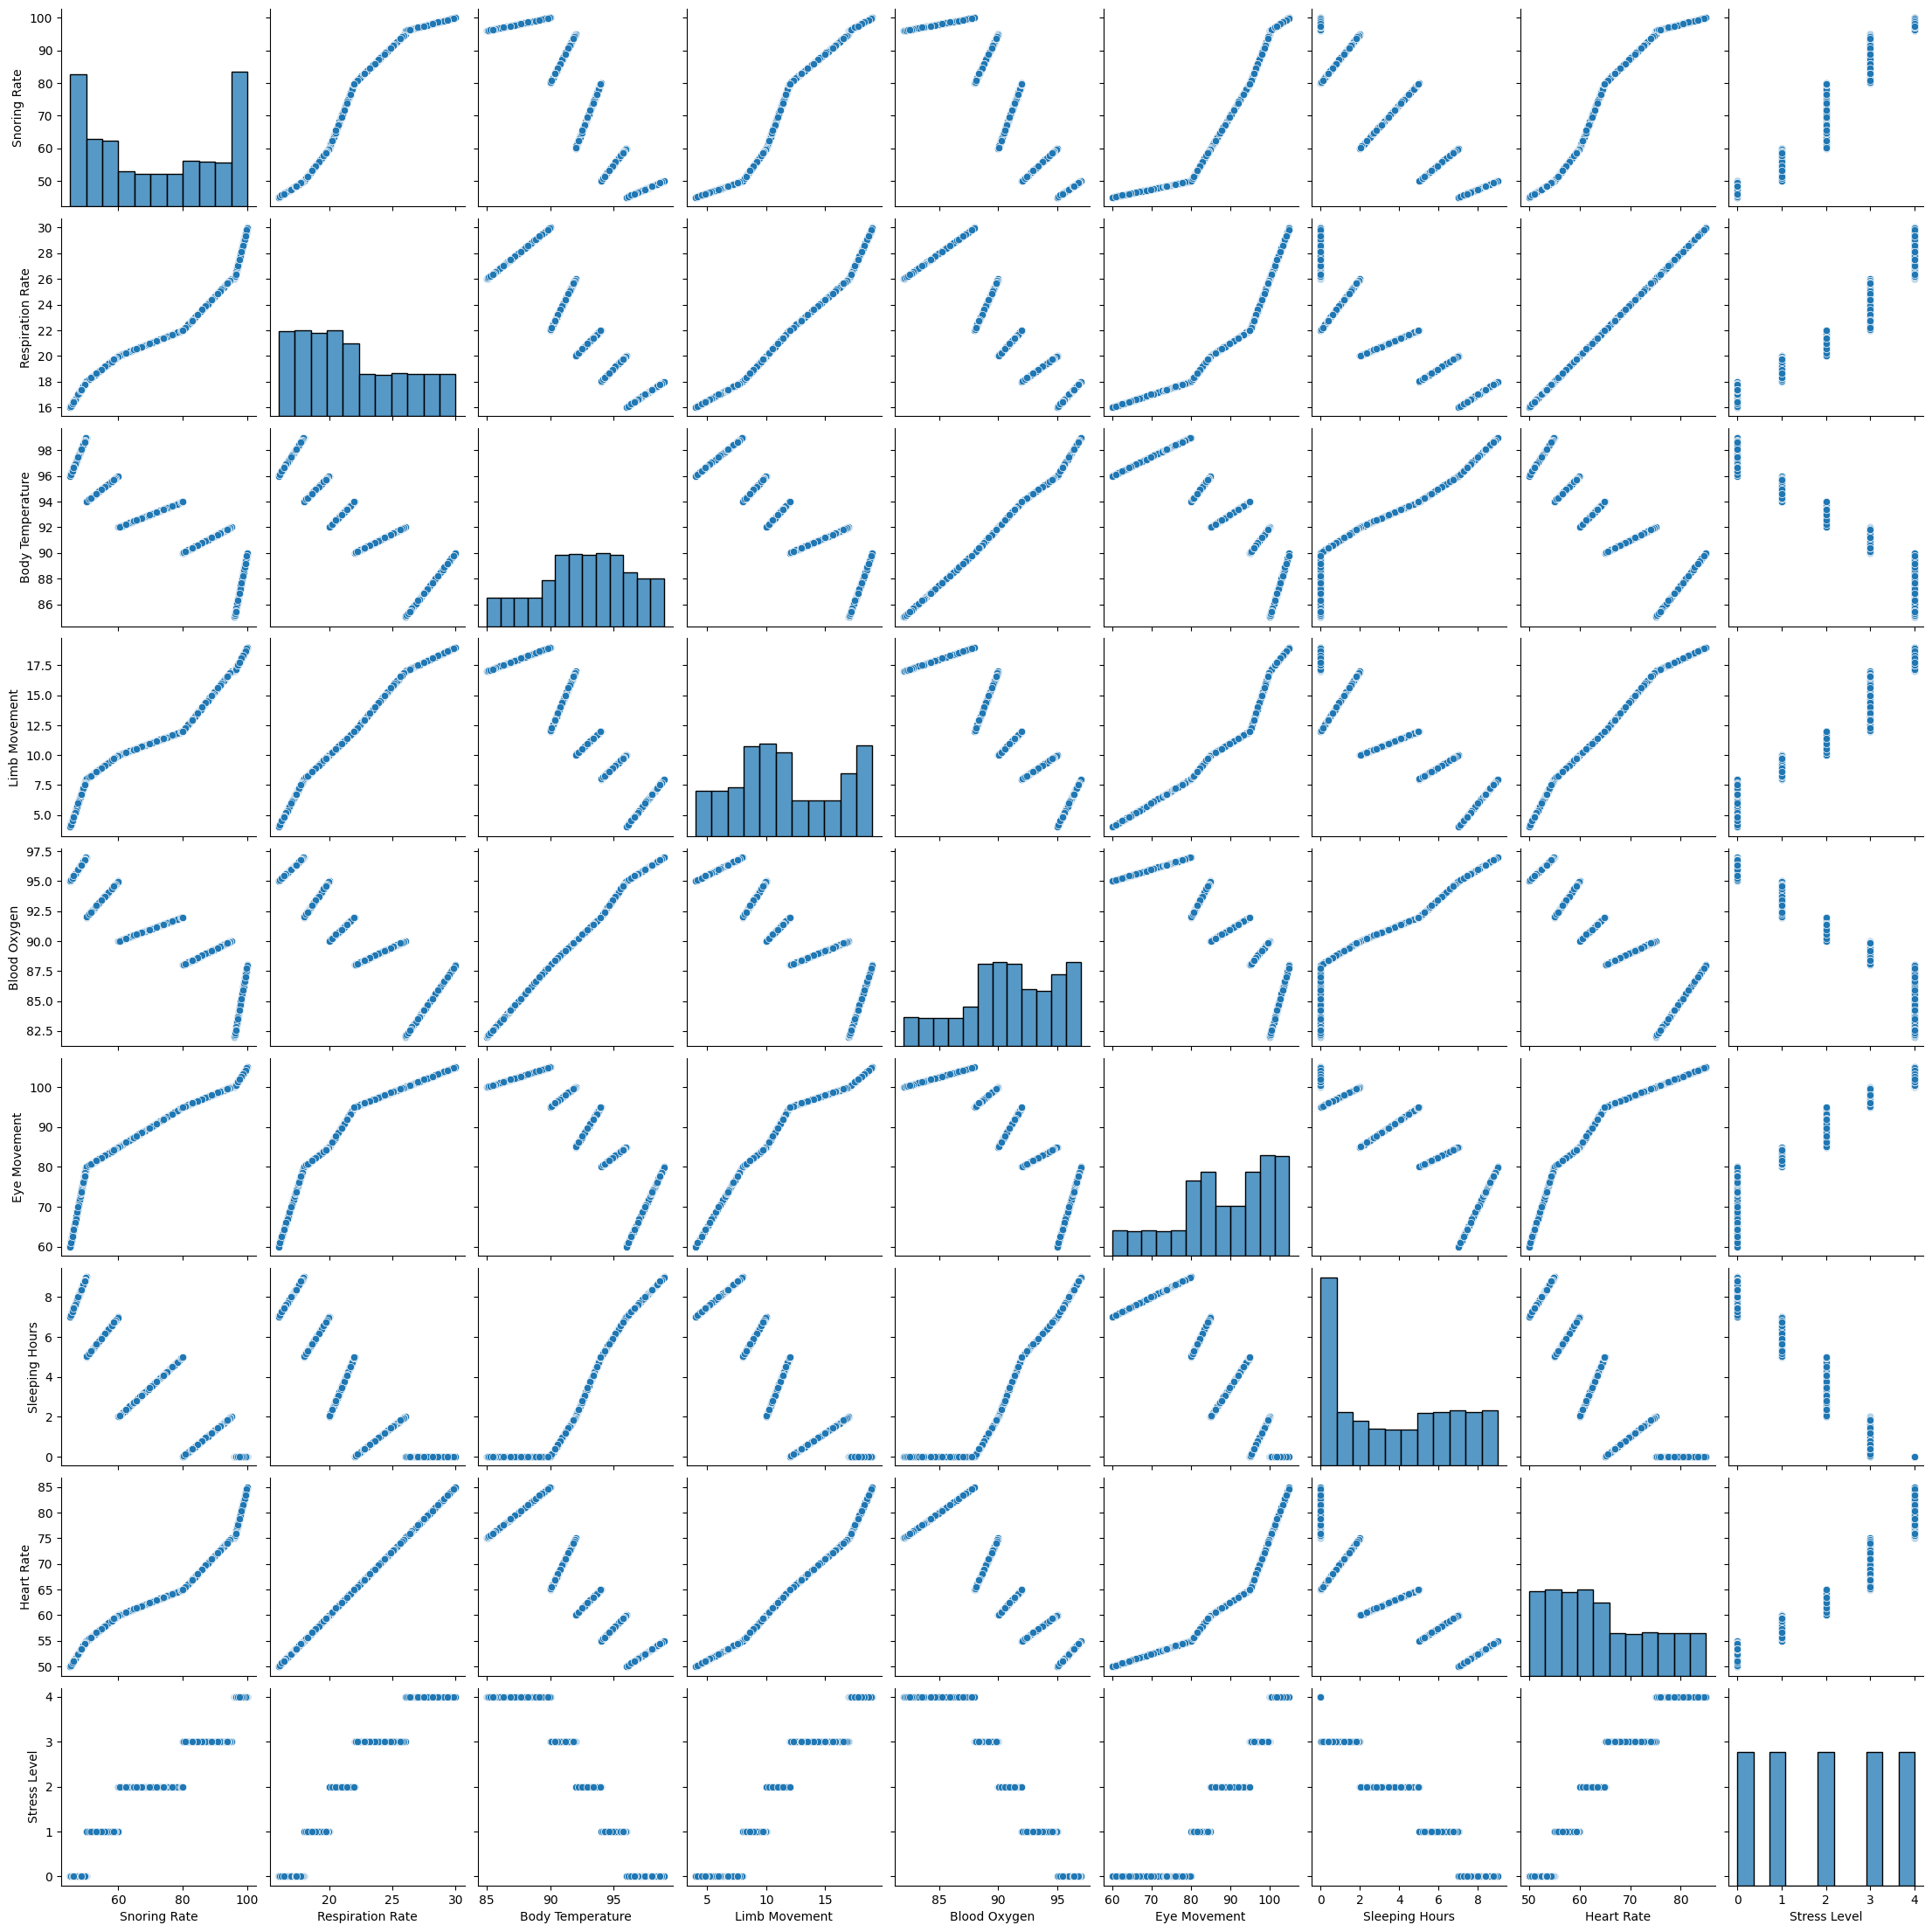

In [ ]:
#pairplot
sns.pairplot(df,size=2.5)
plt.show()

#Step 4: Applying Regression to our model

In [ ]:
  # Multiple Linear Regression
x = df[['Snoring Rate', 'Respiration Rate', 'Limb Movement', 'Eye Movement','Heart Rate','Sleeping Hours']]
#x=df[[]]
y = df[['Stress Level']]

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
#Implenting Linear Model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(x_test).round()


In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stress Level   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.433e+04
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:03:08   Log-Likelihood:                 550.24
No. Observations:                 630   AIC:                            -1088.
Df Residuals:                     624   BIC:                            -1062.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Snoring Rate         0.0072      0.001      5.870      0.000       0.005       0.010
Respiration Rate     0.2432      0.060      4.047      0.000       0.125       0.361
Limb Movement        0.0519      0.013      4.054      0.000       0.027       0.077
Eye Movement         0.0113      0.002      6.534      0.000       0.008       0.015
Heart Rate          -0.0710      0.020     -3.498      0.001      -0.111      -0.031
Sleeping Hours      -0.2277      0.003    -65.690      0.000      -0.235      -0.221
==============================================================================
Omnibus:                       13.306   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.953
Skew:                           0.255   Prob(JB):                     0.000344
Kurtosis:                       3.589   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""